<a href="https://colab.research.google.com/github/rattakan06/229351-StatisticalLearning-or-Statistical-Learning-Labs/blob/main/229351_LAB11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [ ]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

  Using cached statsmodels-0.13.1.tar.gz (18.1 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Using cached statsmodels-0.13.1.tar.gz (18.1 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: s

In [ ]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-18 02:23:24--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.02s   

2025-09-18 02:23:24 (5.84 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [ ]:
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4

In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return dt.datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.head()

/tmp/ipython-input-3530176621.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [ ]:
y = data['MaxTemp'].resample("M").mean()

/tmp/ipython-input-3759875875.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = data['MaxTemp'].resample("M").mean()


In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [ ]:
train = y[:-19]
test = y[-19:]

print(test)

Date
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


<Axes: xlabel='Date'>

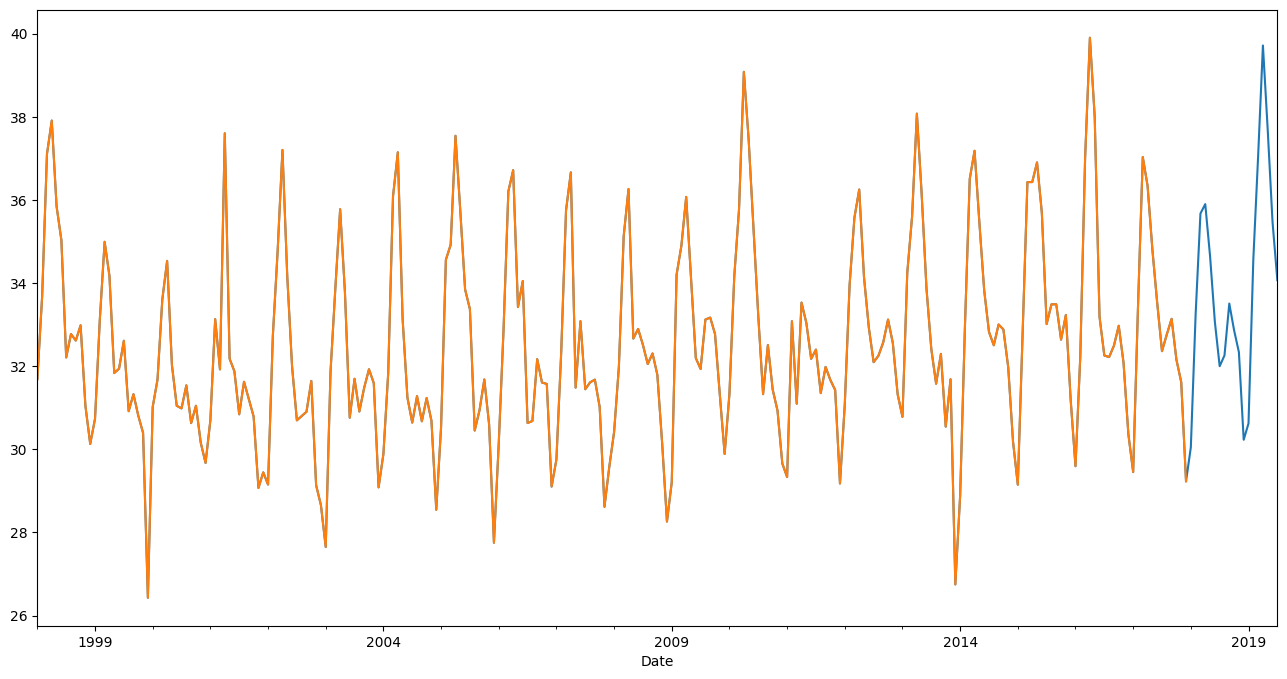

In [ ]:
plt.figure(figsize=(16,8))
y.plot()
train.plot()



Test stationarity

KPSS

𝐻0 : data is stationary

𝐻1 : data is not stationary

ADF

𝐻0 : data is not stationary

𝐻1 : data is stationary


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def KPSStest(timeseries):
  kpsstest = kpss(timeseries)
  print('KPSS test')
  print('Test Statistic: ',kpsstest[0])
  print('p-value: ',kpsstest[1])
  print('Number of Observations Used: ',kpsstest[2])
  print('Critical Values: ',kpsstest[3])

def ADFtest(timeseries):
  adftest = adfuller(timeseries)
  print('ADF test')
  print('Test Statistic: ',adftest[0])
  print('p-value: ',adftest[1])
  print('#Lags Used: ',adftest[2])
  print('Number of Observations Used: ',adftest[3])
  print('Critical Values: ',adftest[4])

In [ ]:
KPSStest(y)
ADFtest(y)

KPSS test
Test Statistic:  0.6428439386603282
p-value:  0.018741460121788345
Number of Observations Used:  4
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -2.222023197657817
p-value:  0.19834961731512274
#Lags Used:  13
Number of Observations Used:  245
Critical Values:  {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}


ยอมรับ H0 kpss โมเดล stationary และปฏิเศธ H0ของ adf จึงยอมรับ H1 Adf ก็คือโมเดล stationary

In [ ]:
print(y)
print(y.shift())

Date
1998-01-31    31.687097
1998-02-28    33.685714
1998-03-31    37.103226
1998-04-30    37.910000
1998-05-31    35.848387
                ...    
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, Length: 259, dtype: float64
Date
1998-01-31          NaN
1998-02-28    31.687097
1998-03-31    33.685714
1998-04-30    37.103226
1998-05-31    37.910000
                ...    
2019-03-31    34.564286
2019-04-30    37.051613
2019-05-31    39.716667
2019-06-30    37.680645
2019-07-31    35.466667
Freq: ME, Name: MaxTemp, Length: 259, dtype: float64


In [ ]:
y_diff = y-y.shift()
y_diff.dropna(inplace=True)

KPSStest(y_diff)
ADFtest(y_diff)

KPSS test
Test Statistic:  0.04516874529942415
p-value:  0.1
Number of Observations Used:  28
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -6.227064576112576
p-value:  5.0583827570587737e-08
#Lags Used:  12
Number of Observations Used:  245
Critical Values:  {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}


/tmp/ipython-input-3817557194.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries)


เมื่อหาผลต่างและtest kpss และ adf สรุปว่า ไม่ staionary

<Axes: xlabel='Date'>

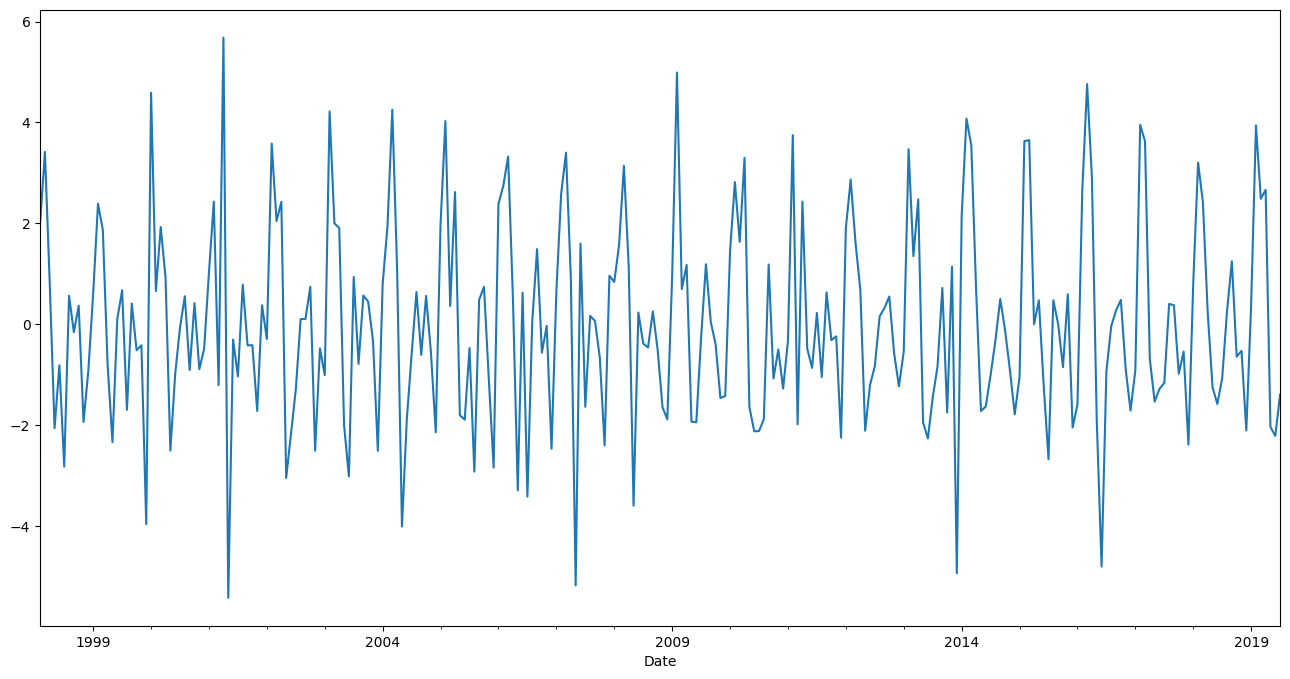

In [ ]:
plt.figure(figsize=(16,8))
y_diff.plot()

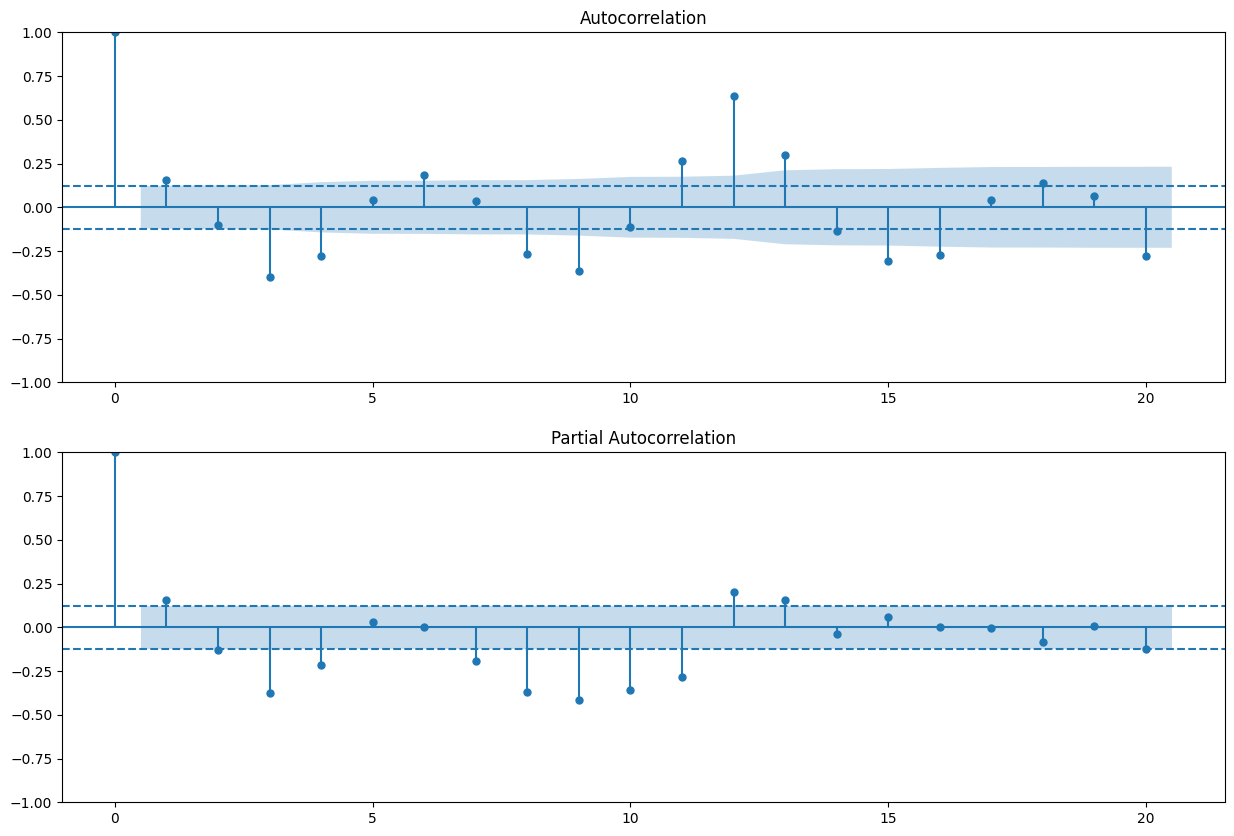

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1,figsize=(15, 10))

plot_acf(y_diff, lags=20, ax=ax[0]);
ax[0].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[0].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

plot_pacf(y_diff, lags=20, ax=ax[1]);
ax[1].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[1].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train, order=(0,0,2))

In [ ]:
train

,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387
...,...
2017-08-31,32.764516
2017-09-30,33.140000
2017-10-31,32.158065


In [ ]:
arima_fit = arima.fit()
yhat = arima_fit.predict('2018-01-31','2019-07-31')

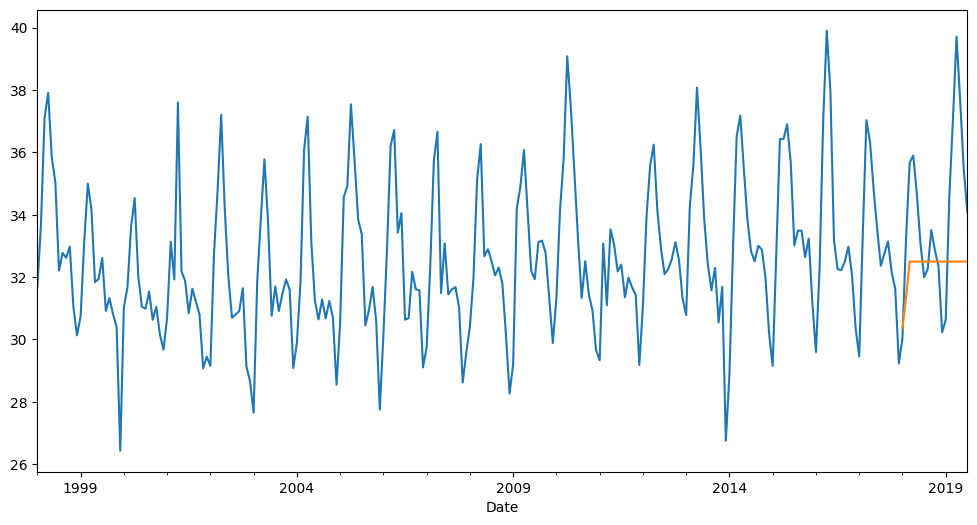

In [ ]:
plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


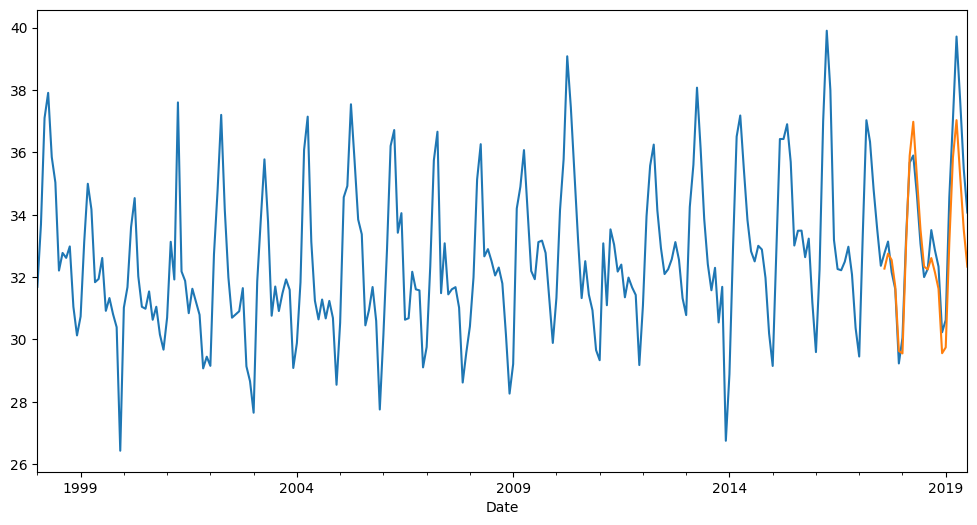

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0,0,3), seasonal_order=(1, 1, 1, 12))

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('2017-08-31','2019-07-31')

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

In [ ]:
print('RMSE:',rmse(test,yhat))

RMSE: 1.2282920237099226


In [ ]:
import pmdarima as pm

auto_fit = pm.auto_arima(train, start_p=0, start_q=0, max_p=12, max_q=12, d=0,
                             seasonal=True, m=12, start_P=0, start_Q=0, D=0,
                             information_criterion = 'aicc', # choose model with the lowest corrected AIC
                             trace = True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True) # don't want convergence warnings

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aicc
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AICC=1097.718, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AICC=823.500, Time=1.18 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AICC=916.810, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AICC=2355.601, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AICC=967.735, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AICC=790.882, Time=3.16 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AICC=inf, Time=2.75 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AICC=780.342, Time=4.54 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AICC=894.023, Time=1.93 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[12] intercept   : AICC=782.217, Time=4.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AICC=856.509, Time=1.25 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,2)[12] intercept   : AICC=814.510, Time=4.97 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AICC=837.431, Time=1.76 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[12] intercept   : AICC=813.189, Time=1.34 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[12] intercept   : AICC=801.220, Time=1.44 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AICC=804.093, Time=1.21 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AICC=851.483, Time=1.36 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12]             : AICC=829.162, Time=0.81 sec

Best model:  ARIMA(1,0,0)(1,0,1)[12] intercept
Total fit time: 32.385 seconds


In [ ]:
auto_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  240
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -385.043
Date:                              Thu, 18 Sep 2025   AIC                            780.086
Time:                                      03:28:32   BIC                            797.489
Sample:                                  01-31-1998   HQIC                           787.098
                                       - 12-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8284      0.623      2.935      0.003       0.607       3.049
ar.L1          0.4250      0.051      8.281      0.000       0.324       0.526
ar.S.L12       0.9024      0.032     28.573      0.000       0.840       0.964
ma.S.L12      -0.5421      0.084     -6.478      0.000      -0.706      -0.378
sigma2         1.3813      0.114     12.120      0.000       1.158       1.605
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                16.08
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.00
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


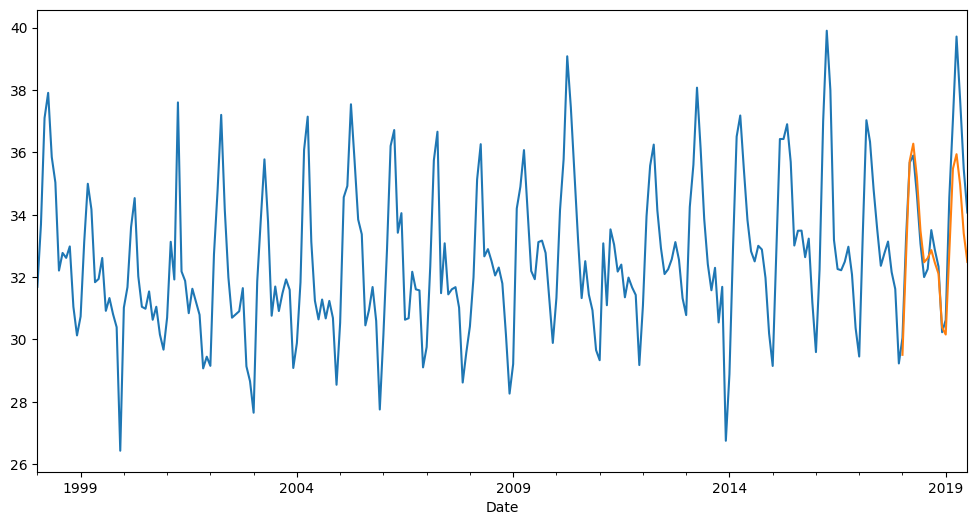

In [ ]:
predictions = auto_fit.predict(19)
yhat = pd.Series(predictions,
                    index=test.index)

plt.figure(figsize=(12,6))
ax = y.plot()
yhat.plot(ax=ax);

In [ ]:
print("RMSE =",rmse(test,yhat))

RMSE = 1.3861156517213364
